# Import thư viện

In [33]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import GridSearchCV

In [34]:
dir = r'data' #đường dẫn thư mục chứa ảnh

#mảng các nhãn
categories = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
            'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L',
            'M', 'N', 'P', 'R', 'S', 'T', 'U', 'V', 'X', 'Y', 'Z']

# Tạo mảng data chứa tên ảnh và nhãn tương ứng

In [35]:
data = []
for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)
    for img in os.listdir(path):
        imgPath = os.path.join(path, img)
        im = cv2.imread(imgPath, 0)
        try:
            im = cv2.resize(im, (50,50))
            image = np.array(im).flatten()
            data.append([image, label])
        except Exception as e:
            pass
print(len(data))   

1107


Lưu dữ liệu dưới dạng file .pickle

In [36]:
pick_in = open('data.pickle','wb')
pickle.dump(data, pick_in)
pick_in.close()

Đọc dữ liệu từ file .pickle

In [37]:
pick_in1 = open('data.pickle','rb')
data = pickle.load(pick_in1)
pick_in1.close()

# Chia tập train và test

In [38]:
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

random.shuffle(data)
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)
    
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, labels, test_size = 0.2)

# Train mô hình có tối ưu tham số C

In [49]:
parameter_candidates = [{'C': [ 0.001, 0.01, 0.1, 0.5, 0.55, 1, 5, 10, 100, 1000], 'kernel': ['poly'], 'gamma' : ['auto']},]

model = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)
model.fit(Xtrain, Ytrain)
print('Best score:', model.best_score_)
print('Best C:',model.best_estimator_.C)

Best score: 0.9638418079096045
Best C: 0.001


Lưu mô hình dưới dạng .xml

In [45]:
#pick = open('model.sav', 'wb')
pick = open('model.xml', 'wb')
pickle.dump(model, pick)
pick.close()

Load mô hình 

In [46]:
#pick1 = open('model.sav', 'rb')
pick1 = open('model.xml', 'rb')
model1 = pickle.load(pick1)
pick1.close()

# Dự đoán

Prediction is:  4


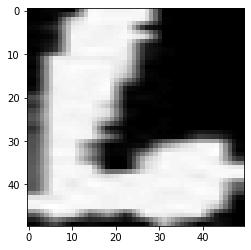

In [47]:
prediction = model.predict(Xtest)
print('Prediction is: ', categories[prediction[1]])
myImg = Xtest[1].reshape(50,50)

plt.imshow(myImg, cmap ='gray')

# Đánh giá

In [48]:
accuracy = model.score(Xtest, Ytest)
print('Accuracy: ', accuracy)

Accuracy:  0.9234234234234234
